In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_USAhousing = pd.read_csv("USA_Housing.csv")
df_USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545,6,7,4.09,23087,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79249,6,7,3.09,40173,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287,6,9,5.13,36882,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345,7,6,3.26,34310,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982,5,8,4.23,26354,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
df_USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2.500000e+03
mean,68593.110000,5.977600,7.002800,3.989816,36032.883600,1.233117e+06
std,10696.973654,1.060919,1.040012,1.241848,9803.904231,3.547254e+05
min,17797.000000,3.000000,3.000000,2.000000,173.000000,3.114052e+04
25%,61461.000000,5.000000,6.000000,3.150000,29381.750000,9.937032e+05
50%,68709.000000,6.000000,7.000000,4.050000,36074.000000,1.235056e+06
75%,75869.000000,7.000000,8.000000,4.500000,42683.250000,1.467923e+06
max,107702.000000,9.000000,11.000000,6.500000,69592.000000,2.469066e+06


In [4]:
# Check for missing values
df_USAhousing.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [5]:
# get the information about the dataset
df_USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              2500 non-null   int64  
 1   Avg. Area House Age           2500 non-null   int64  
 2   Avg. Area Number of Rooms     2500 non-null   int64  
 3   Avg. Area Number of Bedrooms  2500 non-null   float64
 4   Area Population               2500 non-null   int64  
 5   Price                         2500 non-null   float64
 6   Address                       2500 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 136.8+ KB


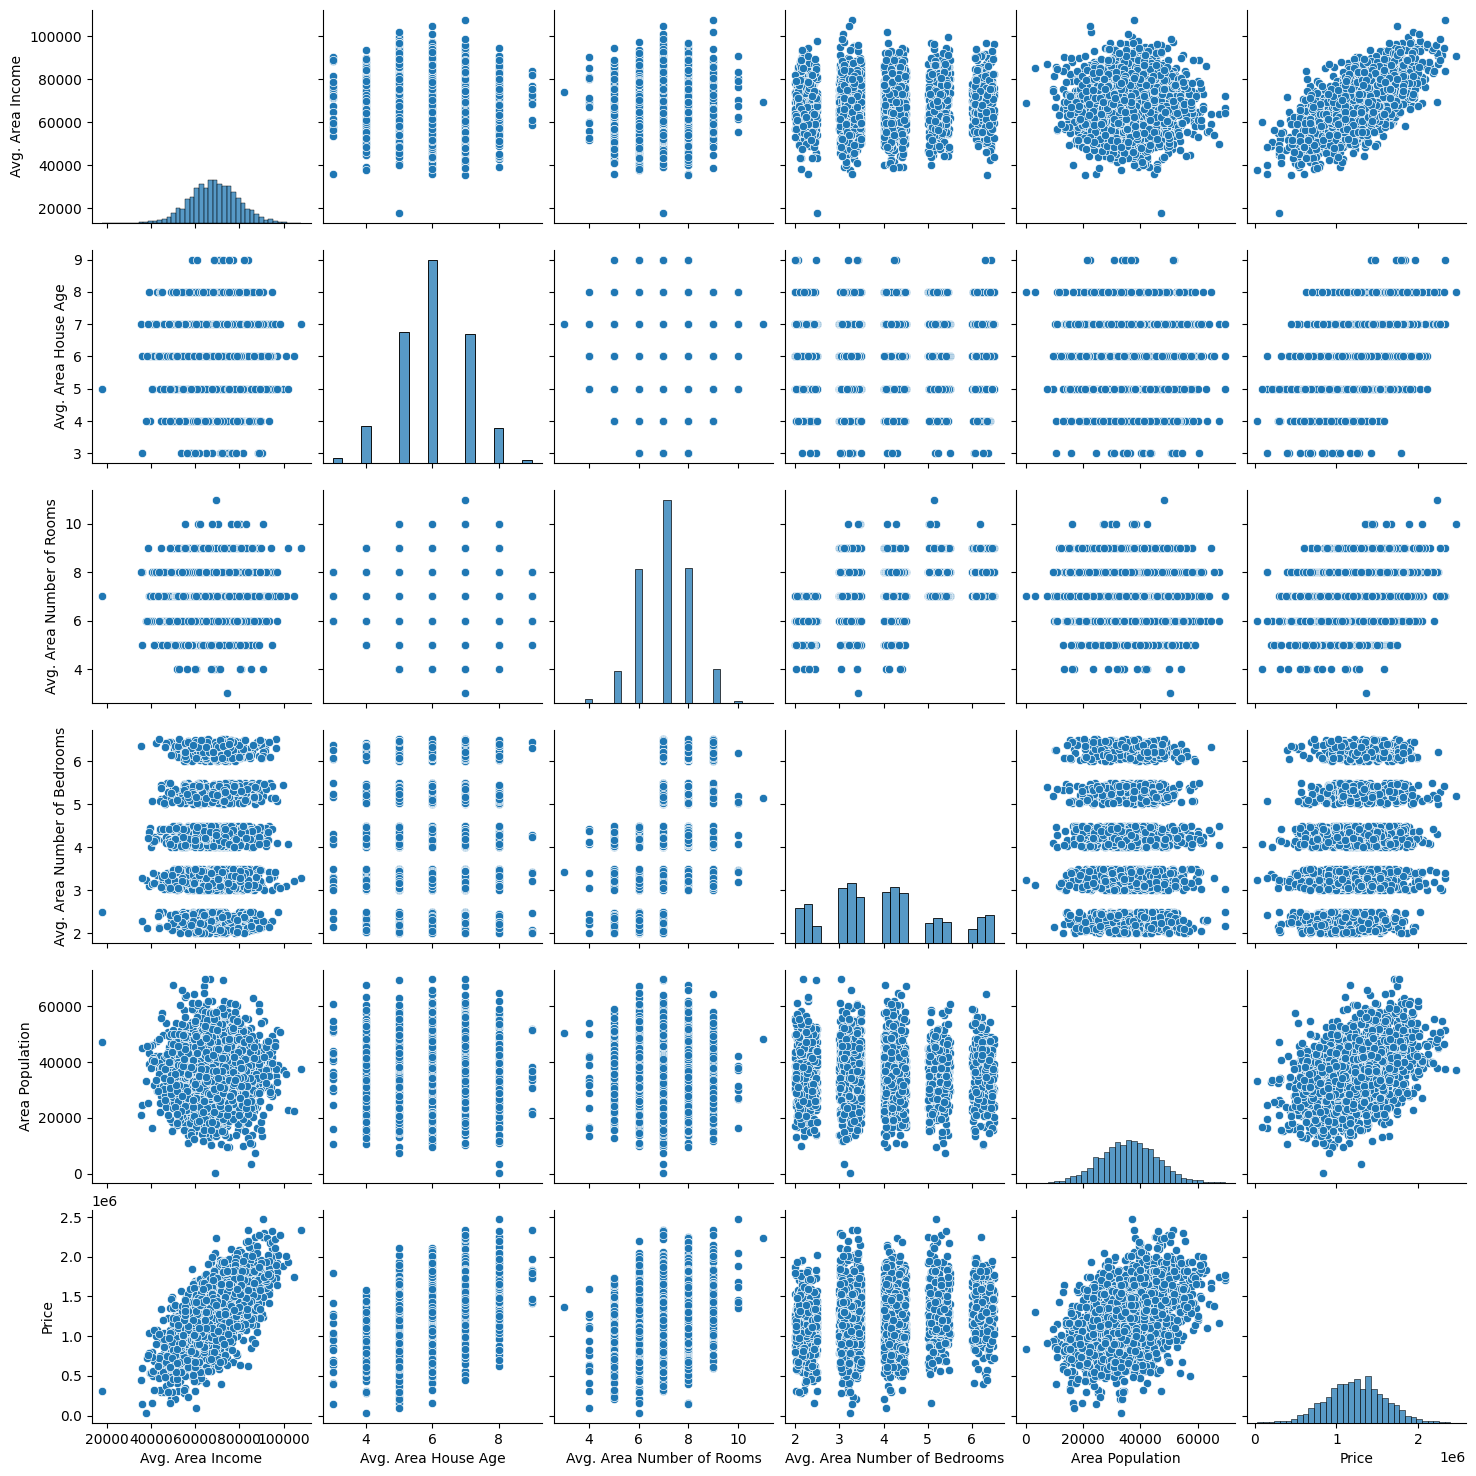

In [6]:
# Exploaratory Data Analysis (EDA)
sns.pairplot(df_USAhousing)

C:\Users\harsh\AppData\Local\Temp\ipykernel_5884\2625027789.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_USAhousing["Price"])


<Axes: xlabel='Price', ylabel='Density'>

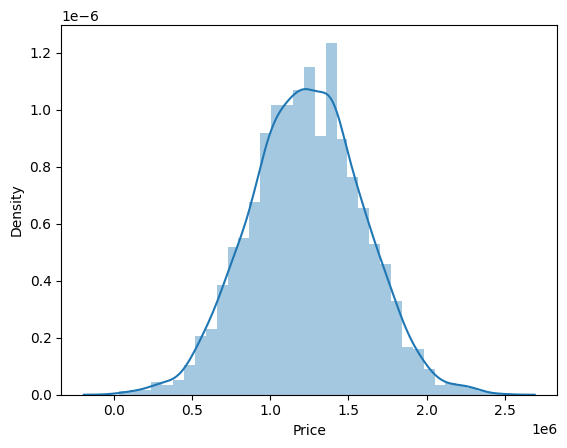

In [7]:
sns.distplot(df_USAhousing["Price"])

<Axes: >

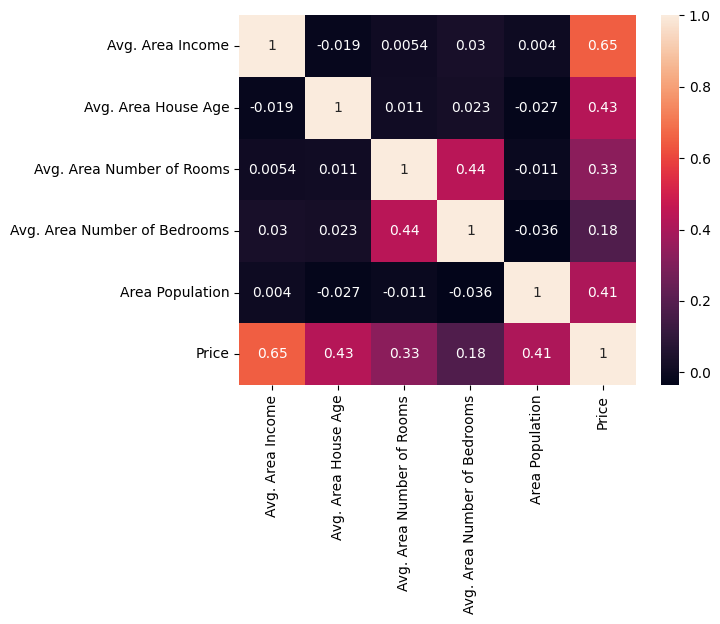

In [8]:
sns.heatmap(df_USAhousing.corr(numeric_only=True), annot=True)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

C:\Users\harsh\AppData\Local\Temp\ipykernel_5884\2923319481.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_USAhousing["Price"])


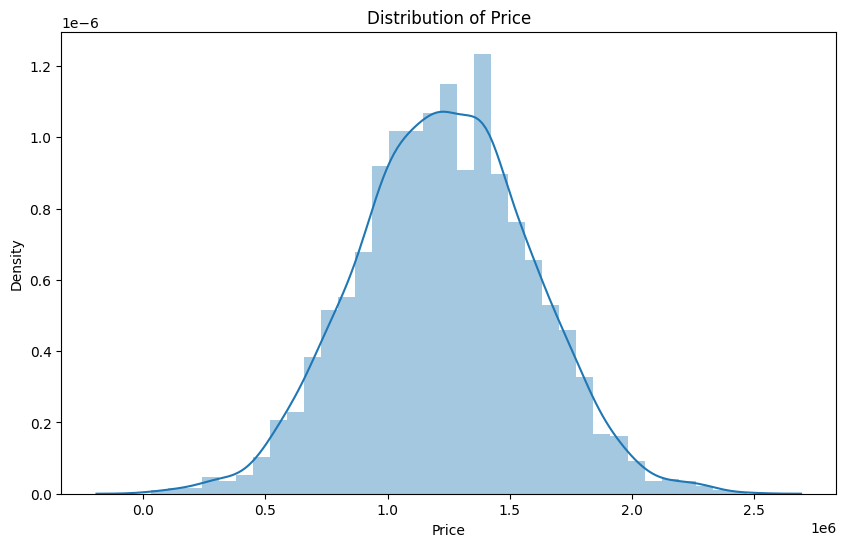

In [18]:
# Visualize the distribution of the target variable 'Price'
plt.figure(figsize=(10, 6))
sns.distplot(df_USAhousing["Price"])
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Density")
plt.show()

In [ ]:
# model training
X = df_USAhousing.drop(["Price", "Address"], axis=1)
y = df_USAhousing["Price"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
model.score(X_test, y_test)

0.8740454064406344

In [ ]:
# metrics
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 14519364497.013063
R-squared: 0.8740454064406344


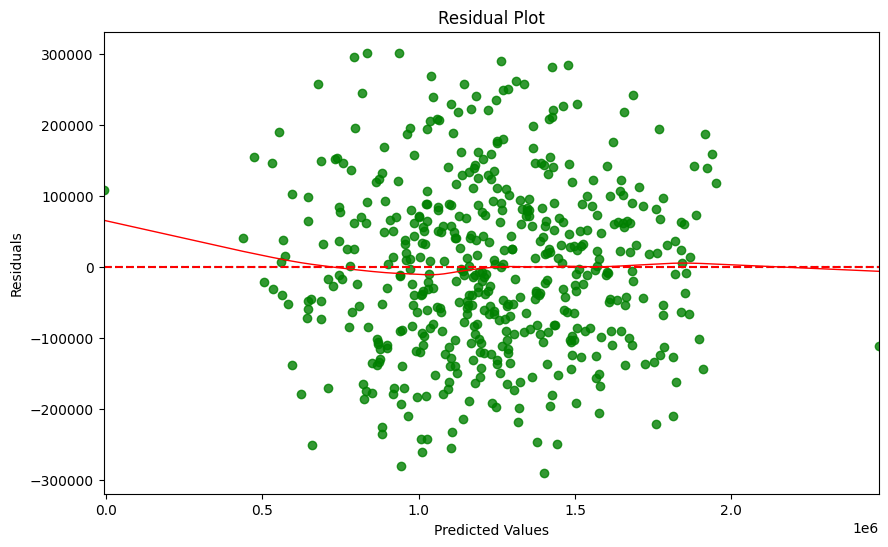

In [ ]:
# residual plot
plt.figure(figsize=(10, 6))
sns.residplot(
    x=y_pred,
    y=y_test - y_pred,
    lowess=True,
    color="g",
    line_kws={"color": "red", "lw": 1},
)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(0, color="red", linestyle="--")
plt.show()